In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_game = pd.read_csv('game.csv')
# on garde que la "Regular Season"
df_game = df_game[df_game['season_type'].isin(['Regular Season'])]
# on garde que les années supérieures à 2010
df_game= df_game[df_game['season_id'] >= 21946]
# on garde que les colonnes suivantes : 'season_id', 'team_name_home', 'wl_home', 'team_name_away', 'wl_away'
df_game = df_game.loc[:,['season_id', 'team_name_home', 'wl_home', 'team_name_away', 'wl_away']]
df_game

,season_id,team_name_home,wl_home,team_name_away,wl_away
0,21946,Toronto Huskies,L,New York Knicks,W
1,21946,St. Louis Bombers,W,Pittsburgh Ironmen,L
2,21946,Providence Steamrollers,W,Boston Celtics,L
3,21946,Chicago Stags,W,New York Knicks,L
4,21946,Detroit Falcons,L,Washington Capitols,W
...,...,...,...,...,...
65537,22022,New York Knicks,L,Indiana Pacers,W
65538,22022,Brooklyn Nets,L,Philadelphia 76ers,W
65539,22022,Chicago Bulls,W,Detroit Pistons,L
65540,22022,Toronto Raptors,W,Milwaukee Bucks,L


In [32]:
# conversion de season_id en année
def supprimer_premier_2(valeur):
    valeur_str = str(valeur)
    return int(valeur_str.replace('2', '', 1)) if '2' in valeur_str else valeur

df_game['season_id'] = df_game['season_id'].apply(supprimer_premier_2)
df_game['season_id'] = pd.to_datetime(df_game['season_id'], format='%Y').dt.year
df_game

,season_id,team_name_home,wl_home,team_name_away,wl_away
0,1946,Toronto Huskies,L,New York Knicks,W
1,1946,St. Louis Bombers,W,Pittsburgh Ironmen,L
2,1946,Providence Steamrollers,W,Boston Celtics,L
3,1946,Chicago Stags,W,New York Knicks,L
4,1946,Detroit Falcons,L,Washington Capitols,W
...,...,...,...,...,...
65537,2022,New York Knicks,L,Indiana Pacers,W
65538,2022,Brooklyn Nets,L,Philadelphia 76ers,W
65539,2022,Chicago Bulls,W,Detroit Pistons,L
65540,2022,Toronto Raptors,W,Milwaukee Bucks,L


In [33]:
# total des matchs 'away' gagnés par saison
df_new_game_away = df_game.groupby(['team_name_away', 'season_id'])['wl_away'].value_counts().reset_index(name='total_away')
df_new_game_away = df_new_game_away.sort_values(by=['team_name_away', 'season_id', 'wl_away'])
# on conserve que les matchs gagnés
df_new_game_away = df_new_game_away.loc[df_new_game_away['wl_away'] == 'W'].reset_index()
df_new_game_away

,index,team_name_away,season_id,wl_away,total_away
0,1,Anderson Packers,1949,W,12
1,3,Atlanta Hawks,1968,W,19
2,5,Atlanta Hawks,1969,W,18
3,7,Atlanta Hawks,1971,W,14
4,9,Atlanta Hawks,1972,W,18
...,...,...,...,...,...
1514,3029,Washington Wizards,2019,W,9
1515,3031,Washington Wizards,2020,W,15
1516,3033,Washington Wizards,2021,W,14
1517,3035,Washington Wizards,2022,W,16


In [34]:
# total des matchs 'home' gagnés par saison
df_new_game_home = df_game.groupby(['team_name_home', 'season_id'])['wl_home'].value_counts().reset_index(name='total_home')
df_new_game_home = df_new_game_home.sort_values(by=['team_name_home', 'season_id', 'wl_home'])
# on conserve que les matchs gagnés
df_new_game_home = df_new_game_home.loc[df_new_game_home['wl_home'] == 'W'].reset_index()
df_new_game_home

,index,team_name_home,season_id,wl_home,total_home
0,0,Anderson Packers,1949,W,25
1,2,Atlanta Hawks,1968,W,29
2,4,Atlanta Hawks,1969,W,30
3,6,Atlanta Hawks,1971,W,22
4,8,Atlanta Hawks,1972,W,28
...,...,...,...,...,...
1514,3029,Washington Wizards,2019,W,16
1515,3030,Washington Wizards,2020,W,19
1516,3032,Washington Wizards,2021,W,21
1517,3035,Washington Wizards,2022,W,19


In [35]:
# on rassemble le total_away
df_new_game_home.insert(loc=len(df_new_game_home.columns), column='total_away', value=df_new_game_away['total_away'])
df_new_game_home

,index,team_name_home,season_id,wl_home,total_home,total_away
0,0,Anderson Packers,1949,W,25,12
1,2,Atlanta Hawks,1968,W,29,19
2,4,Atlanta Hawks,1969,W,30,18
3,6,Atlanta Hawks,1971,W,22,14
4,8,Atlanta Hawks,1972,W,28,18
...,...,...,...,...,...,...
1514,3029,Washington Wizards,2019,W,16,9
1515,3030,Washington Wizards,2020,W,19,15
1516,3032,Washington Wizards,2021,W,21,14
1517,3035,Washington Wizards,2022,W,19,16


In [36]:
# somme des home + away
colomns_list = ['total_home', 'total_away']
df_new_game_home['somme'] = df_new_game_home[colomns_list].sum(axis=1)
df_new_game_home

,index,team_name_home,season_id,wl_home,total_home,total_away,somme
0,0,Anderson Packers,1949,W,25,12,37
1,2,Atlanta Hawks,1968,W,29,19,48
2,4,Atlanta Hawks,1969,W,30,18,48
3,6,Atlanta Hawks,1971,W,22,14,36
4,8,Atlanta Hawks,1972,W,28,18,46
...,...,...,...,...,...,...,...
1514,3029,Washington Wizards,2019,W,16,9,25
1515,3030,Washington Wizards,2020,W,19,15,34
1516,3032,Washington Wizards,2021,W,21,14,35
1517,3035,Washington Wizards,2022,W,19,16,35


In [37]:
# suppression des colonnes inutiles
df_new_game = df_new_game_home.loc[:,['team_name_home', 'season_id', 'somme']]
df_new_game

,team_name_home,season_id,somme
0,Anderson Packers,1949,37
1,Atlanta Hawks,1968,48
2,Atlanta Hawks,1969,48
3,Atlanta Hawks,1971,36
4,Atlanta Hawks,1972,46
...,...,...,...
1514,Washington Wizards,2019,25
1515,Washington Wizards,2020,34
1516,Washington Wizards,2021,35
1517,Washington Wizards,2022,35


In [38]:
df_draft_history = pd.read_csv('draft_history.csv')

In [39]:
df_draft_history = df_draft_history[df_draft_history['season'] >= 2010]
list_team = (df_draft_history.groupby(['team_city', 'team_name', 'season'])['overall_pick'].sum()/df_draft_history.groupby(['team_city', 'team_name', 'season'])['overall_pick'].count()).reset_index(name='total_pick')
list_team = list_team[(list_team['total_pick'] >= 9) & (list_team['total_pick'] <= 12)].reset_index()
list_team = list_team['team_city'] + ' ' + list_team['team_name']
list_team = list_team.value_counts().index
list_team.tolist()

['Dallas Mavericks',
 'Houston Rockets',
 'Detroit Pistons',
 'Golden State Warriors',
 'Minnesota Timberwolves',
 'New Orleans Hornets',
 'Oklahoma City Thunder',
 'Phoenix Suns',
 'Washington Wizards']

In [40]:
list = ['Washington Wizards', 'Detroit Pistons', 'Cleveland Cavaliers', 'Phoenix Suns', 'Sacramento Kings', 'Charlotte Hornets', 'Orlando Magic']
df_selectionne = df_new_game[df_new_game['team_name_home'].isin(list)]

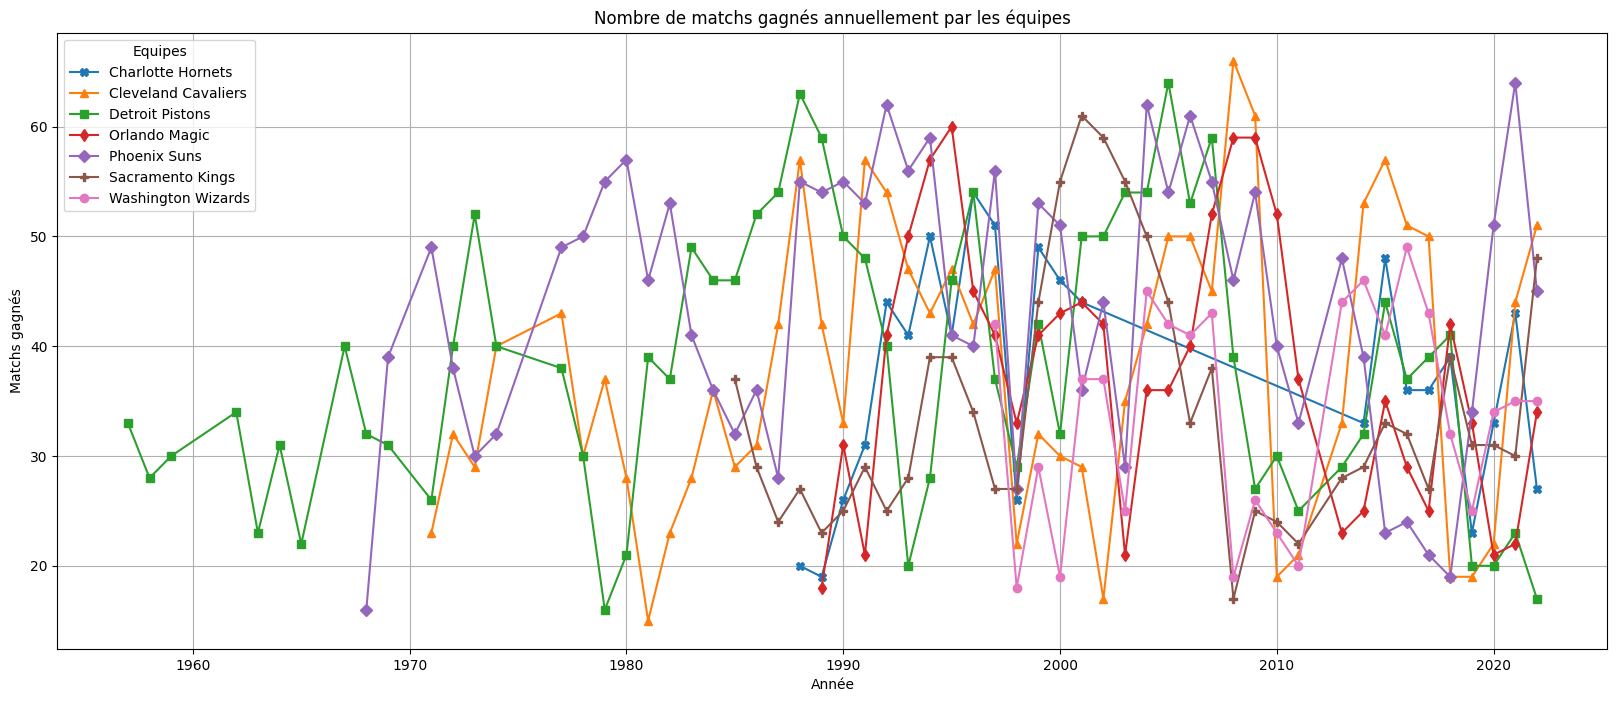

In [41]:
# Tracer un graphique en ligne pour chaque nom
plt.figure(figsize=(20, 8))
marqueurs = {
    'Washington Wizards': 'o',
    'Detroit Pistons': 's',
    'Cleveland Cavaliers': '^',
    'Phoenix Suns': 'D',
    'Sacramento Kings': 'P',
    'Charlotte Hornets': 'X',
    'Orlando Magic': 'd'
}
# Utiliser groupby pour tracer des lignes pour chaque nom
for nom, group in df_selectionne.groupby('team_name_home'):
    plt.plot(group['season_id'], group['somme'], marker=marqueurs[nom], linestyle='-', label=nom)

# Ajouter des titres et des labels
plt.title('Nombre de matchs gagnés annuellement par les équipes')
plt.xlabel('Année')
plt.ylabel('Matchs gagnés')
plt.legend(title='Equipes')
plt.grid(True)

# Afficher le graphique
plt.show()

In [42]:
df_Wizards = df_new_game[df_new_game['team_name_home'].isin(['Phoenix Suns'])]

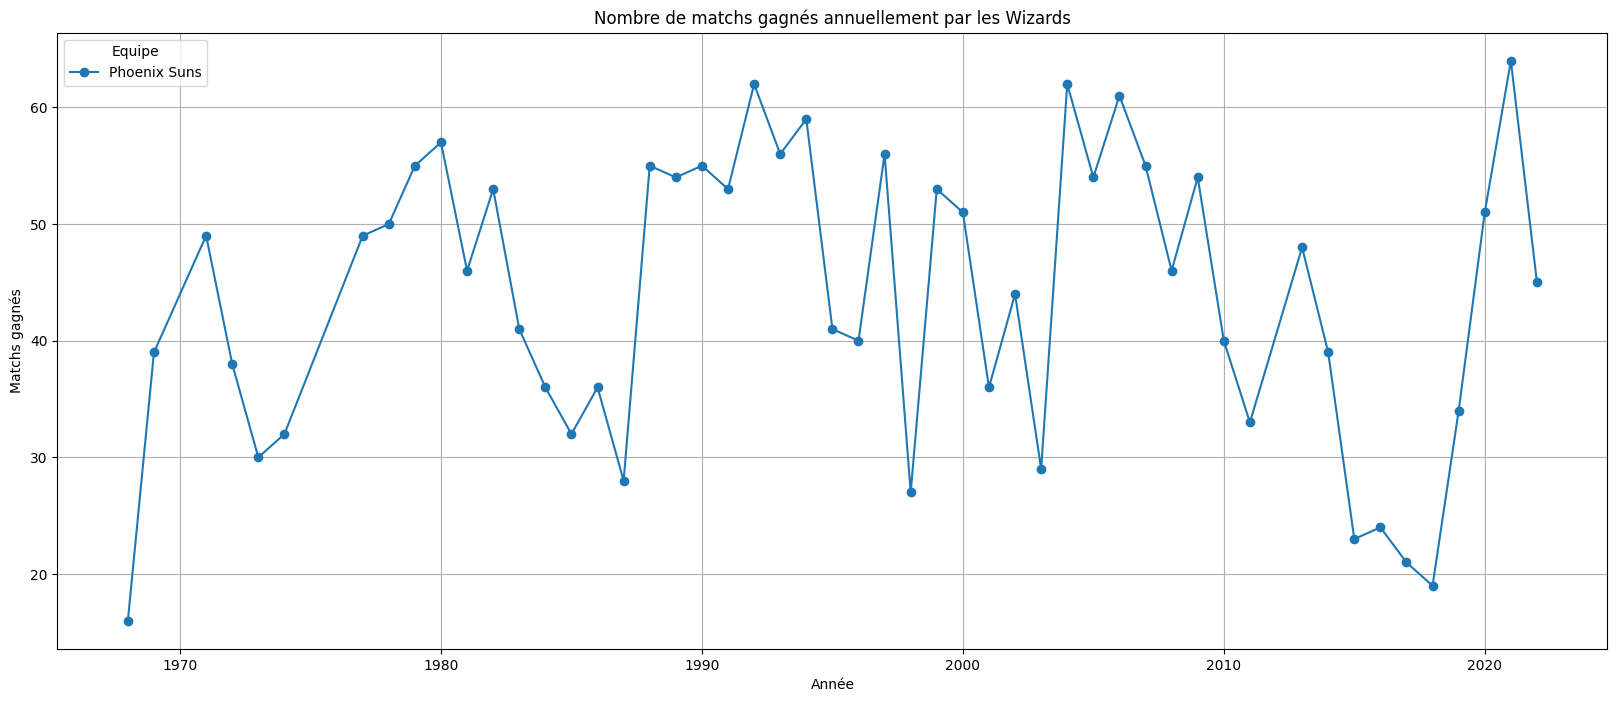

In [43]:
# Tracer un graphique en ligne pour chaque nom
plt.figure(figsize=(20, 8))
# Utiliser groupby pour tracer des lignes pour chaque nom
for nom, group in df_Wizards.groupby('team_name_home'):
    plt.plot(group['season_id'], group['somme'], marker='o', linestyle='-', label=nom)

# Ajouter des titres et des labels
plt.title('Nombre de matchs gagnés annuellement par les Wizards')
plt.xlabel('Année')
plt.ylabel('Matchs gagnés')
plt.legend(title='Equipe')
plt.grid(True)

# Afficher le graphique
plt.show()

In [44]:
# df_draft_history = df_draft_history[df_draft_history['overall_pick'] <= 14]
df_draft_Wizards = df_draft_history[df_draft_history['team_name'] == 'Suns']
list_player = df_draft_Wizards['player_name']
list_player

7259          Gani Lawal
7273      Dwayne Collins
7286     Markieff Morris
7346    Kendall Marshall
7398            Alex Len
7423     Nemanja Nedovic
7450        Alex Oriakhi
7466        Devin Booker
7497     Andrew Harrison
7517       Dragan Bender
7521     Marquese Chriss
7547          Tyler Ulis
7577        Josh Jackson
7605          Davon Reed
7627         Alec Peters
7634       Deandre Ayton
7649        Zhaire Smith
7664          Elie Okobo
7692         George King
7699      Jarrett Culver
7725           KZ Okpala
7763         Jalen Smith
7842      Day'Ron Sharpe
7983      Toumani Camara
Name: player_name, dtype: object

In [45]:
print(df_draft_Wizards)

      person_id       player_name  season  round_number  round_pick  \
7259     202371        Gani Lawal    2010             2          16   
7273     202384    Dwayne Collins    2010             2          30   
7286     202693   Markieff Morris    2011             1          13   
7346     203088  Kendall Marshall    2012             1          13   
7398     203458          Alex Len    2013             1           5   
7423     203517   Nemanja Nedovic    2013             1          30   
7450     203531      Alex Oriakhi    2013             2          27   
7466    1626164      Devin Booker    2015             1          13   
7497    1626150   Andrew Harrison    2015             2          14   
7517    1627733     Dragan Bender    2016             1           4   
7521    1627737   Marquese Chriss    2016             1           8   
7547    1627755        Tyler Ulis    2016             2           4   
7577    1628367      Josh Jackson    2017             1           4   
7605  

In [46]:
df_common_player_info = pd.read_csv('common_player_info.csv')

In [47]:
df_Wizards_position = df_common_player_info[df_common_player_info['display_first_last'].isin(list_player)]
df_Wizards_position = df_Wizards_position.loc[:,['position', 'display_first_last']]
df_Wizards_position = df_Wizards_position.fillna('other')
df_Wizards_position

,position,display_first_last
145,Center,Deandre Ayton
259,Forward,Dragan Bender
358,Guard,Devin Booker
659,Forward,Marquese Chriss
797,Guard-Forward,Jarrett Culver
1546,Guard,Andrew Harrison
1791,Guard-Forward,Josh Jackson
2045,Guard,George King
2046,Forward-Guard,George King
2163,Forward,Gani Lawal


In [48]:
df_draft_Wizards = df_draft_Wizards.merge(df_Wizards_position, left_on='player_name', right_on='display_first_last')
df_draft_Wizards

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag,position,display_first_last
0,202371,Gani Lawal,2010,2,16,46,Draft,1610612756,Phoenix,Suns,PHX,Georgia Tech,College/University,1,Forward,Gani Lawal
1,202693,Markieff Morris,2011,1,13,13,Draft,1610612756,Phoenix,Suns,PHX,Kansas,College/University,1,Forward,Markieff Morris
2,203088,Kendall Marshall,2012,1,13,13,Draft,1610612756,Phoenix,Suns,PHX,North Carolina,College/University,1,Guard,Kendall Marshall
3,203458,Alex Len,2013,1,5,5,Draft,1610612756,Phoenix,Suns,PHX,Maryland,College/University,1,Center,Alex Len
4,1626164,Devin Booker,2015,1,13,13,Draft,1610612756,Phoenix,Suns,PHX,Kentucky,College/University,1,Guard,Devin Booker
5,1626150,Andrew Harrison,2015,2,14,44,Draft,1610612756,Phoenix,Suns,PHX,Kentucky,College/University,1,Guard,Andrew Harrison
6,1627733,Dragan Bender,2016,1,4,4,Draft,1610612756,Phoenix,Suns,PHX,Maccabi Tel Aviv B.C. (Israel),Other Team/Club,1,Forward,Dragan Bender
7,1627737,Marquese Chriss,2016,1,8,8,Draft,1610612756,Phoenix,Suns,PHX,Washington,College/University,1,Forward,Marquese Chriss
8,1627755,Tyler Ulis,2016,2,4,34,Draft,1610612756,Phoenix,Suns,PHX,Kentucky,College/University,1,Guard,Tyler Ulis
9,1628367,Josh Jackson,2017,1,4,4,Draft,1610612756,Phoenix,Suns,PHX,Kansas,College/University,1,Guard-Forward,Josh Jackson


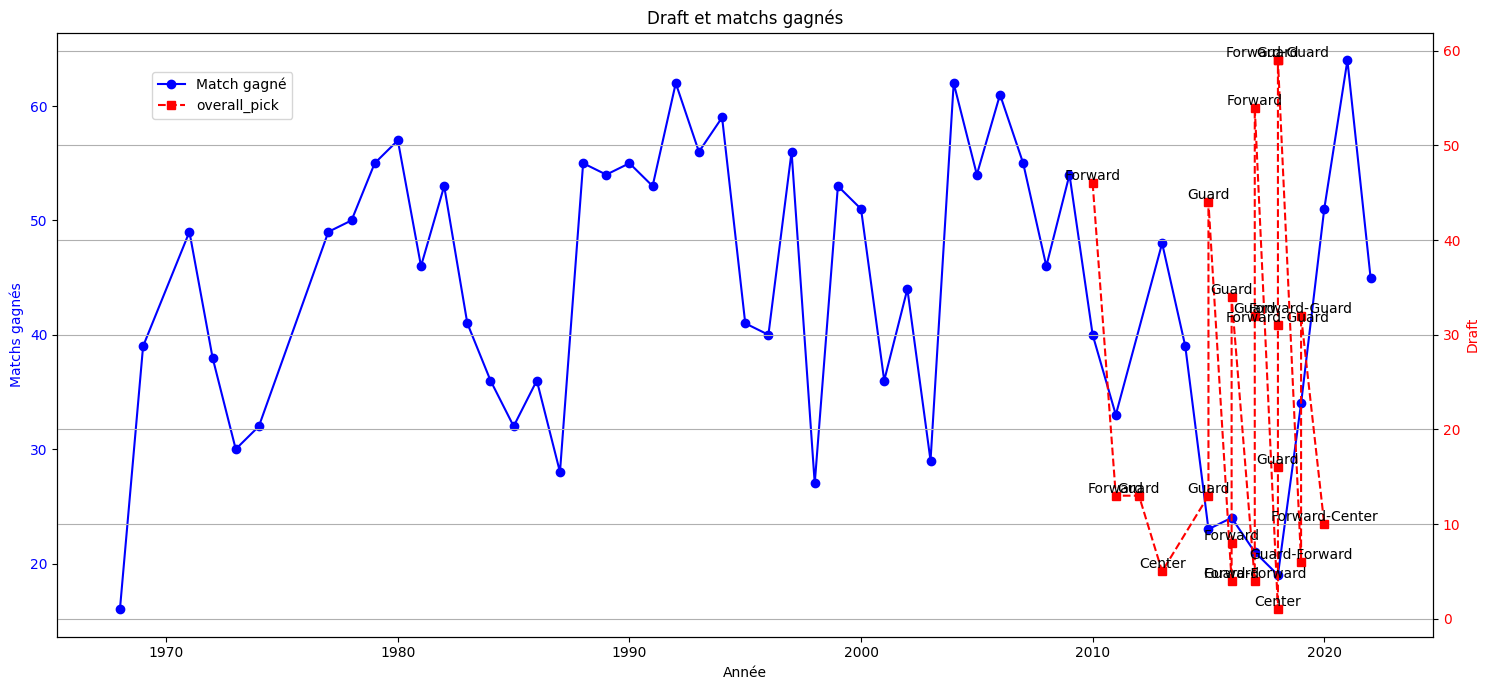

In [49]:
# Créer la figure et les axes
fig, ax1 = plt.subplots(figsize=(15, 7))

# Tracer les ventes avec l'axe y principal
ax1.plot(df_Wizards['season_id'], df_Wizards['somme'], marker='o', linestyle='-', color='b', label='Match gagné')
ax1.set_xlabel('Année')
ax1.set_ylabel('Matchs gagnés', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Créer un deuxième axe y qui partage le même axe x
ax2 = ax1.twinx()
ax2.plot(df_draft_Wizards['season'], df_draft_Wizards['overall_pick'], marker='s', linestyle='--', color='r', label='overall_pick')
ax2.set_ylabel('Draft', color='r')
ax2.tick_params(axis='y', labelcolor='r')


for i in range(len(df_draft_Wizards['season'])):
    plt.text(df_draft_Wizards['season'][i], df_draft_Wizards['overall_pick'][i], df_draft_Wizards['position'][i], fontsize=10, ha='center', va='bottom')

# Ajouter des titres et des labels
plt.title('Draft et matchs gagnés')

# Afficher une légende
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.grid(True)
# Afficher le graphique
plt.show()

In [50]:
df_Wizards

,team_name_home,season_id,somme
1112,Phoenix Suns,1968,16
1113,Phoenix Suns,1969,39
1114,Phoenix Suns,1971,49
1115,Phoenix Suns,1972,38
1116,Phoenix Suns,1973,30
1117,Phoenix Suns,1974,32
1118,Phoenix Suns,1977,49
1119,Phoenix Suns,1978,50
1120,Phoenix Suns,1979,55
1121,Phoenix Suns,1980,57


In [51]:
df_draft_Wizards

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag,position,display_first_last
0,202371,Gani Lawal,2010,2,16,46,Draft,1610612756,Phoenix,Suns,PHX,Georgia Tech,College/University,1,Forward,Gani Lawal
1,202693,Markieff Morris,2011,1,13,13,Draft,1610612756,Phoenix,Suns,PHX,Kansas,College/University,1,Forward,Markieff Morris
2,203088,Kendall Marshall,2012,1,13,13,Draft,1610612756,Phoenix,Suns,PHX,North Carolina,College/University,1,Guard,Kendall Marshall
3,203458,Alex Len,2013,1,5,5,Draft,1610612756,Phoenix,Suns,PHX,Maryland,College/University,1,Center,Alex Len
4,1626164,Devin Booker,2015,1,13,13,Draft,1610612756,Phoenix,Suns,PHX,Kentucky,College/University,1,Guard,Devin Booker
5,1626150,Andrew Harrison,2015,2,14,44,Draft,1610612756,Phoenix,Suns,PHX,Kentucky,College/University,1,Guard,Andrew Harrison
6,1627733,Dragan Bender,2016,1,4,4,Draft,1610612756,Phoenix,Suns,PHX,Maccabi Tel Aviv B.C. (Israel),Other Team/Club,1,Forward,Dragan Bender
7,1627737,Marquese Chriss,2016,1,8,8,Draft,1610612756,Phoenix,Suns,PHX,Washington,College/University,1,Forward,Marquese Chriss
8,1627755,Tyler Ulis,2016,2,4,34,Draft,1610612756,Phoenix,Suns,PHX,Kentucky,College/University,1,Guard,Tyler Ulis
9,1628367,Josh Jackson,2017,1,4,4,Draft,1610612756,Phoenix,Suns,PHX,Kansas,College/University,1,Guard-Forward,Josh Jackson


In [52]:

df_draft_Wizards2 = df_draft_Wizards.loc[:, ['position', 'overall_pick']]
df_draft_Wizards2['team_name_home'] = df_draft_Wizards['team_city'].str.cat(df_draft_Wizards['team_name'], sep=' ')
df_draft_Wizards2['season_id'] = df_draft_Wizards['season']
df_draft_Wizards2

,position,overall_pick,team_name_home,season_id
0,Forward,46,Phoenix Suns,2010
1,Forward,13,Phoenix Suns,2011
2,Guard,13,Phoenix Suns,2012
3,Center,5,Phoenix Suns,2013
4,Guard,13,Phoenix Suns,2015
5,Guard,44,Phoenix Suns,2015
6,Forward,4,Phoenix Suns,2016
7,Forward,8,Phoenix Suns,2016
8,Guard,34,Phoenix Suns,2016
9,Guard-Forward,4,Phoenix Suns,2017


In [53]:
merged_df = pd.merge(df_Wizards, df_draft_Wizards2, on=['team_name_home', 'season_id'], how='outer')
merged_df

,team_name_home,season_id,somme,position,overall_pick
0,Phoenix Suns,1968,16.0,NaN,NaN
1,Phoenix Suns,1969,39.0,NaN,NaN
2,Phoenix Suns,1971,49.0,NaN,NaN
3,Phoenix Suns,1972,38.0,NaN,NaN
4,Phoenix Suns,1973,30.0,NaN,NaN
...,...,...,...,...,...
57,Phoenix Suns,2019,34.0,Guard-Forward,6.0
58,Phoenix Suns,2019,34.0,Forward-Guard,32.0
59,Phoenix Suns,2020,51.0,Forward-Center,10.0
60,Phoenix Suns,2021,64.0,NaN,NaN


In [54]:
merged_df['somme'] = merged_df['somme'].interpolate()
merged_df['overall_pick'] = merged_df['overall_pick'].fillna(61)
merged_df.loc[merged_df['overall_pick'] == 61, 'position'] = 'Nothing'
merged_df

,team_name_home,season_id,somme,position,overall_pick
0,Phoenix Suns,1968,16.0,Nothing,61.0
1,Phoenix Suns,1969,39.0,Nothing,61.0
2,Phoenix Suns,1971,49.0,Nothing,61.0
3,Phoenix Suns,1972,38.0,Nothing,61.0
4,Phoenix Suns,1973,30.0,Nothing,61.0
...,...,...,...,...,...
57,Phoenix Suns,2019,34.0,Guard-Forward,6.0
58,Phoenix Suns,2019,34.0,Forward-Guard,32.0
59,Phoenix Suns,2020,51.0,Forward-Center,10.0
60,Phoenix Suns,2021,64.0,Nothing,61.0


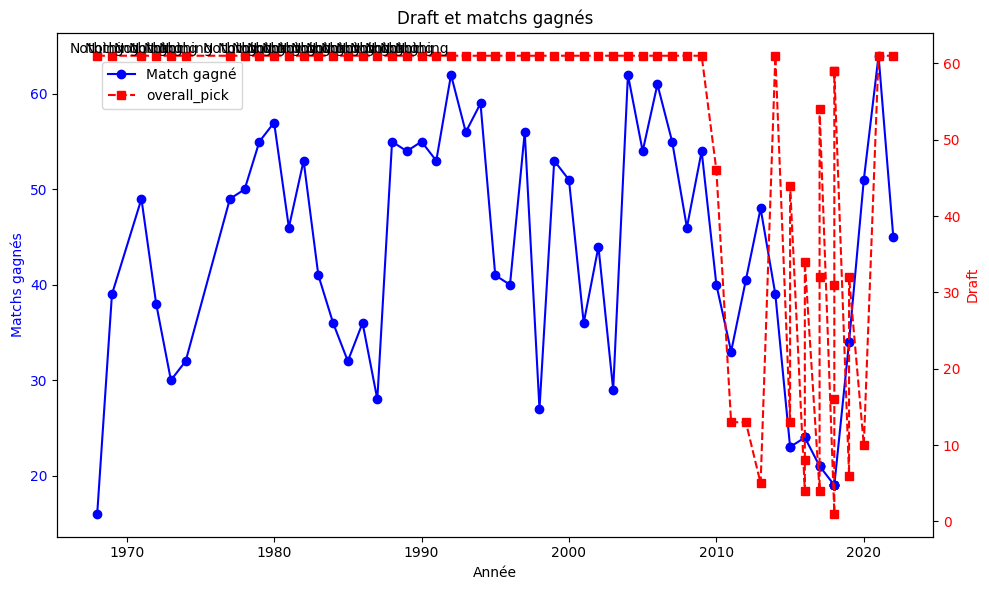

In [55]:
# Créer la figure et les axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Tracer les ventes avec l'axe y principal
ax1.plot(merged_df['season_id'], merged_df['somme'], marker='o', linestyle='-', color='b', label='Match gagné')
ax1.set_xlabel('Année')
ax1.set_ylabel('Matchs gagnés', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Créer un deuxième axe y qui partage le même axe x
ax2 = ax1.twinx()
ax2.plot(merged_df['season_id'], merged_df['overall_pick'], marker='s', linestyle='--', color='r', label='overall_pick')
ax2.set_ylabel('Draft', color='r')
ax2.tick_params(axis='y', labelcolor='r')


for i in range(len(df_draft_Wizards['season'])):
    plt.text(merged_df['season_id'][i], merged_df['overall_pick'][i], merged_df['position'][i], fontsize=10, ha='center', va='bottom')

# Ajouter des titres et des labels
plt.title('Draft et matchs gagnés')

# Afficher une légende
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Afficher le graphique
plt.show()

In [56]:
merged_df['season_id'] = pd.to_datetime(merged_df['season_id'].astype(str) + '-06-30')
merged_df['season_id']

0    1968-06-30
1    1969-06-30
2    1971-06-30
3    1972-06-30
4    1973-06-30
        ...    
57   2019-06-30
58   2019-06-30
59   2020-06-30
60   2021-06-30
61   2022-06-30
Name: season_id, Length: 62, dtype: datetime64[ns]

In [57]:
merged_df.corr(numeric_only=bool)['somme'].sort_values()

overall_pick    0.455437
somme           1.000000
Name: somme, dtype: float64

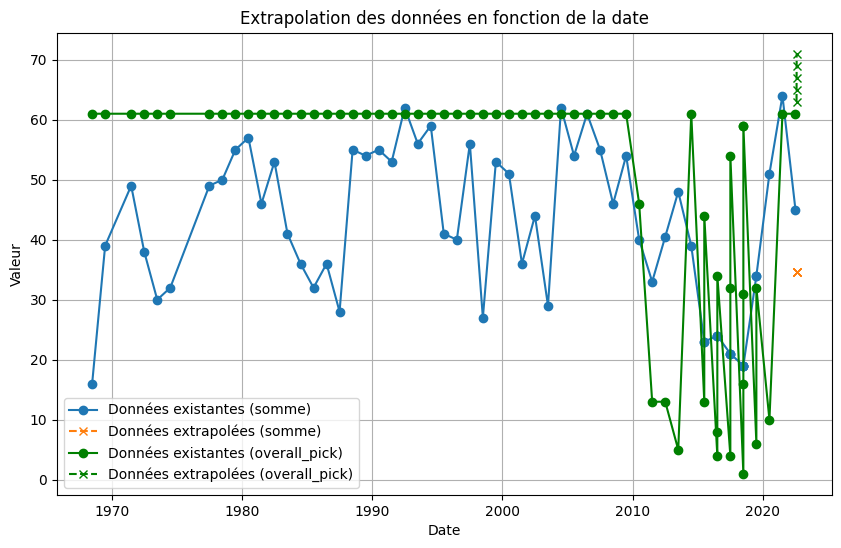

    season_id      somme  overall_pick position
0  1968-06-30  16.000000          61.0  Nothing
1  1969-06-30  39.000000          61.0  Nothing
2  1971-06-30  49.000000          61.0  Nothing
3  1972-06-30  38.000000          61.0  Nothing
4  1973-06-30  30.000000          61.0  Nothing
..        ...        ...           ...      ...
0  2022-07-30  34.658291          63.0        A
1  2022-07-31  34.657612          65.0        B
2  2022-08-01  34.656932          67.0        A
3  2022-08-02  34.656253          69.0        B
4  2022-08-03  34.655573          71.0        A

[67 rows x 4 columns]


In [58]:


import numpy as np
from datetime import timedelta
from sklearn.linear_model import LinearRegression

# Création d'un DataFrame d'exemple avec des dates et des valeurs
data = {
    'date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'value': [10, 15, np.nan, 20, np.nan, 25, 30, np.nan, 35, 40],
    'value2': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23],
    'category': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
}

df = merged_df


# Convertir les dates en nombres pour la régression
df['date_num'] = pd.to_numeric(df['season_id'])
#df['date_num'] = pd.to_datetime(merged_df['season_id'].astype(str) + '-01-01')

# Préparer les données pour la régression multivariée
X = df[['date_num', 'overall_pick']]
y = df['somme']

# Ajuster une régression linéaire multivariée aux données existantes
model = LinearRegression()
model.fit(X, y)

# Définir une plage de dates pour extrapoler
future_dates = pd.date_range(start=df['season_id'].iloc[-1] + timedelta(days=30), periods=5, freq='D')
future_dates_num = pd.to_numeric(future_dates)

# Créer des valeurs futures pour 'value2' en les augmentant linéairement
future_values2 = np.linspace(df['overall_pick'].iloc[-1] + 2, df['overall_pick'].iloc[-1] + 2 * 5, 5)

# Préparer les données futures pour la prédiction
future_X = pd.DataFrame({
    'date_num': future_dates_num,
    'overall_pick': future_values2
})

# Extrapoler les valeurs futures en utilisant le modèle ajusté
future_values = model.predict(future_X)

# Créer des catégories futures basées sur une alternance
future_categories = ['A' if i % 2 == 0 else 'B' for i in range(len(future_dates))]

# Créer un DataFrame pour les dates futures
future_df = pd.DataFrame({
    'season_id': future_dates,
    'somme': future_values,
    'overall_pick': future_values2,
    'position': future_categories
})

# Combiner les données existantes et extrapolées
combined_df = pd.concat([df[['season_id', 'somme', 'overall_pick', 'position']], future_df])

# Tracer les données
plt.figure(figsize=(10, 6))
plt.plot(df['season_id'], df['somme'], label='Données existantes (somme)', marker='o')
plt.plot(future_df['season_id'], future_df['somme'], label='Données extrapolées (somme)', linestyle='--', marker='x')
plt.plot(df['season_id'], df['overall_pick'], label='Données existantes (overall_pick)', marker='o', color='green')
plt.plot(future_df['season_id'], future_df['overall_pick'], label='Données extrapolées (overall_pick)', linestyle='--', marker='x', color='green')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Extrapolation des données en fonction de la date')
plt.legend()
plt.grid(True)
plt.show()

print(combined_df)
